<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/statistics/kstest/KS_earthquake_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats

In [ ]:
eqs = pd.read_csv("https://github.com/fedhere/MLPNS_FBianco/blob/main/statistics/KStest/earthquakes.csv?raw=true", sep=" ")

In [ ]:
eqs.shape

(70798, 34)

In [ ]:
eqs.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eqs.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,...,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,...,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,...,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eqs.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'LON', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'NPH', 'NGRM'],
      dtype='object')

In [ ]:
eqs.rename({"#YYY/MM/DD": "date", 
            "HH:mm:SS.ss": "time"}, axis=1, inplace=True)

In [ ]:
eqs.head()

,date,time,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eqs.time.dtype, eqs.date.dtype


(dtype('O'), dtype('O'))

In [ ]:
pd.to_datetime("1984/01/01" + " " + "19:38:19.79")

Timestamp('1984-01-01 19:38:19.790000')

In [ ]:
eqs.date.map(pd.to_datetime)

KeyboardInterrupt: ignored

In [ ]:
for i in range(len(eqs)):
  if eqs.iloc[i]["time"].endswith("60.00"):
    print(eqs.iloc[i]["time"])
    print(eqs.iloc[i]["time"].replace("60.00", "59.99"))
    eqs.at[i, "time"] = eqs.iloc[i]["time"].replace("60.00", "59.99")
    print(eqs.iloc[i]["time"])


04:48:60.00
04:48:59.99
04:48:59.99
14:19:60.00
14:19:59.99
14:19:59.99
21:48:60.00
21:48:59.99
21:48:59.99
15:34:60.00
15:34:59.99
15:34:59.99
06:41:60.00
06:41:59.99
06:41:59.99


In [ ]:
for i in range(10):
  print(eqs.iloc[i].date  + " " + eqs.iloc[i].time)


1984/01/01 01:30:57.52
1984/01/01 05:31:34.16
1984/01/01 06:59:05.14
1984/01/01 11:10:25.29
1984/01/01 19:38:19.79
1984/01/01 19:39:19.67
1984/01/01 20:19:47.21
1984/01/02 03:51:52.76
1984/01/02 05:00:12.44
1984/01/02 05:02:17.29


In [ ]:
 [eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(10)]


['1984/01/01 01:30:57.52',
 '1984/01/01 05:31:34.16',
 '1984/01/01 06:59:05.14',
 '1984/01/01 11:10:25.29',
 '1984/01/01 19:38:19.79',
 '1984/01/01 19:39:19.67',
 '1984/01/01 20:19:47.21',
 '1984/01/02 03:51:52.76',
 '1984/01/02 05:00:12.44',
 '1984/01/02 05:02:17.29']

In [ ]:
eqs['datetime'] = [eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(len(eqs))]
eqs["datetime"] = eqs["datetime"].map(pd.to_datetime)



In [ ]:
#delete
# first I create the timetamps pairs for the beginning and end of the valid periods. 
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [ ]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [ ]:
gooddates = (((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1])) + 
          ((eqs.datetime >= ss[1][0]) * (eqs.datetime <= ss[1][1])) + 
          ((eqs.datetime >= ss[2][0]) * (eqs.datetime <= ss[2][1])) + 
          ((eqs.datetime >= ss[3][0]) * (eqs.datetime <= ss[3][1])) +
          ((eqs.datetime >= ss[4][0]) * (eqs.datetime <= ss[4][1])) +
          ((eqs.datetime >= ss[5][0]) * (eqs.datetime <= ss[5][1])) +
          ((eqs.datetime >= ss[6][0]) * (eqs.datetime <= ss[6][1])) +
          ((eqs.datetime >= ss[7][0]) * (eqs.datetime <= ss[7][1])) +
          ((eqs.datetime >= ss[8][0]) * (eqs.datetime <= ss[8][1])) + 
          ((eqs.datetime >= ss[9][0]) * (eqs.datetime <= ss[9][1])) +
          ((eqs.datetime >= ss[10][0]) * (eqs.datetime <= ss[10][1]))).values

In [ ]:
gooddates

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
eqs.columns

Index(['date', 'time', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'LON',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NPH',
       'NGRM', 'datetime'],
      dtype='object')

In [ ]:
eqGoodData = eqs[gooddates][["datetime", 'Unnamed: 5']]

In [ ]:
eqGoodData.rename({'Unnamed: 5':"mag"}, axis=1, inplace=True)

In [ ]:
eqGoodData.head()

,datetime,mag
0,1984-01-01 01:30:57.520,2.02
1,1984-01-01 05:31:34.160,2.12
2,1984-01-01 06:59:05.140,2.43
3,1984-01-01 11:10:25.290,2.07
4,1984-01-01 19:38:19.790,2.13


In [ ]:
eqGoodData.shape

(18852, 2)

In [ ]:
eqGoodData["mag"].unique()

array([2.02, 2.12, 2.43, 2.07, 2.13, 2.97, 3.24, 2.17, 2.48, 2.65, 3.17,
       2.44, 3.02, 2.1 , 2.41, 2.29, 2.09, 2.03, 2.8 , 2.75, 2.92, 2.32,
       2.  , 2.67, 2.58, 3.11, 2.15, 2.19, 2.56, 3.25, 2.82, 2.22, 2.34,
       2.08, 2.06, 2.14, 2.01, 2.26, 2.62, 2.46, 2.24, 2.16, 2.05, 2.27,
       2.69, 2.57, 2.47, 2.81, 2.23, 2.36, 2.2 , 3.13, 2.49, 2.93, 3.31,
       2.04, 2.11, 2.6 , 2.55, 3.05, 2.28, 3.23, 2.79, 2.3 , 2.84, 2.39,
       2.98, 2.72, 2.61, 2.52, 2.64, 2.35, 2.54, 3.1 , 2.51, 2.53, 3.67,
       3.21, 2.18, 2.31, 2.38, 2.74, 2.83, 2.73, 2.9 , 2.95, 2.37, 2.21,
       2.25, 2.78, 2.63, 3.14, 2.85, 2.71, 3.44, 2.7 , 3.22, 2.87, 2.5 ,
       2.91, 3.53, 3.12, 2.86, 2.89, 2.77, 2.33, 2.68, 2.99, 2.88, 3.86,
       2.45, 3.35, 4.23, 2.42, 3.48, 2.94, 3.  , 3.34, 3.51, 3.32, 3.03,
       3.06, 2.76, 2.59, 2.96, 2.66, 3.3 , 3.01, 2.4 , 3.93, 3.4 , 3.52,
       4.15, 3.08, 3.83, 3.16, 3.8 , 3.62, 3.82, 3.5 , 3.54, 3.49, 3.26,
       3.28, 3.46, 3.45, 3.6 , 3.42, 3.27, 4.26, 3.

In [ ]:
eqGoodData = eqGoodData[eqGoodData["mag"] >=2]

In [ ]:
eqGoodData.shape

(18852, 2)

In [ ]:
eqGoodData['gaps'] = eqGoodData["datetime"].diff().values.astype(float)


In [ ]:
eqGoodData

,datetime,mag,gaps
0,1984-01-01 01:30:57.520,2.02,-9.223372e+18
1,1984-01-01 05:31:34.160,2.12,1.443664e+13
2,1984-01-01 06:59:05.140,2.43,5.250980e+12
3,1984-01-01 11:10:25.290,2.07,1.508015e+13
4,1984-01-01 19:38:19.790,2.13,3.047450e+13
...,...,...,...
70793,2002-12-29 19:37:24.560,2.21,3.014000e+10
70794,2002-12-29 20:17:33.400,2.02,2.408840e+12
70795,2002-12-29 20:21:28.730,2.07,2.353300e+11
70796,2002-12-30 21:51:52.550,2.31,9.182382e+13


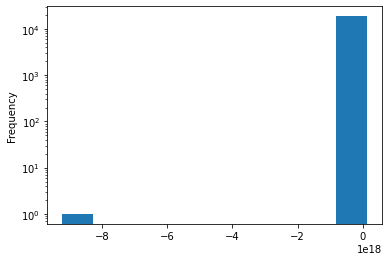

In [ ]:
eqGoodData["gaps"].plot(kind="hist", logy=True);

In [ ]:
eqGoodData.describe()

,mag,gaps
count,18852.000000,1.885200e+04
mean,2.399488,-4.574501e+14
std,0.392436,6.718482e+16
min,2.000000,-9.223372e+18
25%,2.110000,2.736622e+12
50%,2.290000,8.946950e+12
75%,2.570000,2.133966e+13
max,5.800000,1.199632e+17


In [ ]:
eqGoodData = eqGoodData[1:]

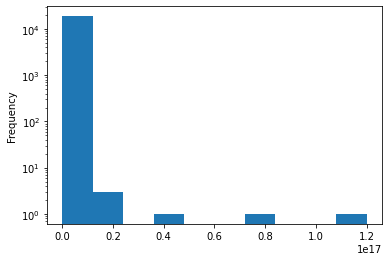

In [ ]:
eqGoodData["gaps"].plot(kind="hist", logy=True);

In [ ]:
monthgap = 2.628e+15 # months in ns
eqGoodData = eqGoodData[eqGoodData.gaps < monthgap]


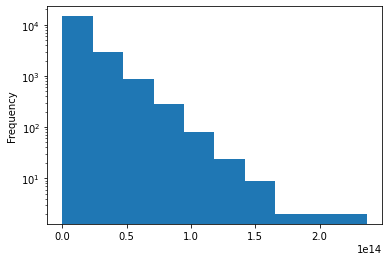

In [ ]:
eqGoodData["gaps"].plot(kind="hist", logy=True);

In [ ]:
alpha = 0.003 # 3 SIGMA 

In [ ]:
import numpy as np
t1 = eqGoodData['gaps'][eqGoodData.mag >= 2]
t2 = eqGoodData['gaps'][eqGoodData.mag >= 2.5]
#t1 = t1[t1 < 3e16]
sp.stats.ks_2samp(np.log10(t1), np.log10(t2))

KstestResult(statistic=0.027581930568767787, pvalue=0.0024725857409166265, statistic_location=12.4585124519953, statistic_sign=-1)

WARNING!! THIS RESTUL IS WRONG CAUSE DATA WAS NOT SCALED APPRIORIATELY! the KS test is particularly sensitive to differences in the mean

(array([0.7986014 , 0.93776224, 0.97902098, 0.99388112, 0.99772727,
        0.99895105, 0.99947552, 0.99982517, 0.99982517, 1.        ]),
 array([1.70000000e+08, 2.36584280e+13, 4.73166860e+13, 7.09749440e+13,
        9.46332020e+13, 1.18291460e+14, 1.41949718e+14, 1.65607976e+14,
        1.89266234e+14, 2.12924492e+14, 2.36582750e+14]),
 [<matplotlib.patches.Polygon at 0x7f7d19857be0>])

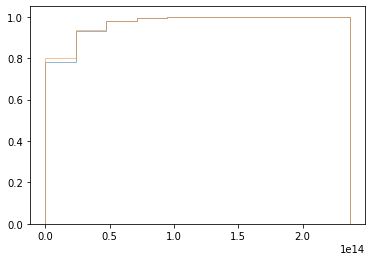

In [ ]:
pl.hist(t1, cumulative=True, alpha=0.5, histtype="step", density=1)
pl.hist(t2, cumulative=True, alpha=0.5, histtype="step", density=1)

original data size: 18840
removing time gaps that are too long. new size: 18837
mean unrescaled time gap 19250664939215.375
removing time gaps too small, first pass: new size 17850
mean unrescaled time gap 1.055
removing time gaps too small, second pass: new size 17821
mean unrescaled time gap 1.002
  
original data size: 5719
removing time gaps that are too long. new size: 5716
mean unrescaled time gap 63383511726731.977
removing time gaps too small, first pass: new size 5339
mean unrescaled time gap 1.070
removing time gaps too small, second pass: new size 5319
mean unrescaled time gap 1.004
  
original data size: 1463
removing time gaps that are too long. new size: 1460
mean unrescaled time gap 247595145239726.031
removing time gaps too small, first pass: new size 1322
mean unrescaled time gap 1.104
removing time gaps too small, second pass: new size 1318
mean unrescaled time gap 1.003
  
original data size: 428
removing time gaps that are too long. new size: 425
mean unrescaled tim

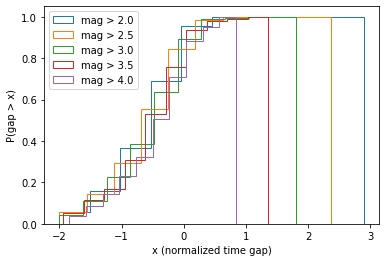

In [ ]:
#delete
def rescale(df, threshold=0.01):
    times = [] # container for all arrays of rescaled time gaps (for 5 magnitude thresholds)
    hss = [] # container for heights of histograms
    binss = [] # container for bins of histograms

    for m in [2, 2.5, 3, 3.5, 4]:
        #select magnitude and convert to floating point numbers
        tmp = df['gaps'][df.mag >= m]
        print("original data size:", len(tmp))
    
        tmp = tmp[tmp < 3e16] #cut outliers (optional)
        print("removing time gaps that are too long. new size:", len(tmp))
   
        for i in range(2): #iterate cuts for stability: do it twice
          rs = tmp.mean()
          print("mean unrescaled time gap {:.3f}".format(rs))
          tmp = tmp[tmp / rs >= threshold] / rs #remove data above threshold, then normalize
          print("removing time gaps too small, first pass: new size", len(tmp))
    
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
    
        tmp = tmp / rs
        print("  ")
    
        times.append(np.log10(tmp)) # the data we will run the ks with is log10(time gaps)
    
        #calculate the histogram of the last array of times (the one that you just calculated)
        hs, bins, patch= pl.hist(times[-1], 
                             cumulative=True, density=1, histtype="step", label="mag > %.1f"%m)
        hss.append(hs)
        binss.append(bins)

    pl.legend(fontsize=10)
    pl.xlabel("x (normalized time gap)")
    pl.ylabel("P(gap > x)")
    return binss, hss, times
  
binss, hss, times = rescale(eqGoodData, threshold=0.01)

In [ ]:
mags = [2, 2.5, 3, 3.5, 4]
for i in range(5):
  for j in range(i+1, 5):
    tmp = sp.stats.ks_2samp(times[i], times[j])
    print(mags[i], mags[j], "{:.3f}".format(tmp[1]))

2 2.5 0.118
2 3 0.583
2 3.5 0.868
2 4 0.409
2.5 3 0.298
2.5 3.5 0.651
2.5 4 0.244
3 3.5 0.586
3 4 0.578
3.5 4 0.481
